In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv('../final_traffic_data.csv')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['TrafficLabel'] = le.fit_transform(df['TrafficLevel'])
df['TrafficLabel'].head(40)

0     0
1     0
2     0
3     0
4     0
5     2
6     2
7     2
8     1
9     1
10    1
11    2
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    2
34    1
35    1
36    1
37    1
38    1
39    1
Name: TrafficLabel, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

X = df[['Latitude', 'Longitude', 'Hour', 'RedRatio', 'OrangeRatio', 'GreenRatio']]
y = df['TrafficLabel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:


model = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=1,
    n_jobs=-1,
    eval_metric='mlogloss',
    random_state=42,
    use_label_encoder=False
)
model.fit(X_train, y_train)


d:\traffic_congestion\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:00:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [7]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))


              precision    recall  f1-score   support

       Heavy       0.95      0.91      0.93       274
       Light       0.94      0.97      0.95       253
    Moderate       0.87      0.88      0.88       240

    accuracy                           0.92       767
   macro avg       0.92      0.92      0.92       767
weighted avg       0.92      0.92      0.92       767



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3832 entries, 0 to 3831
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        3832 non-null   object 
 1   Latitude         3832 non-null   float64
 2   Longitude        3832 non-null   float64
 3   RedPixels        3832 non-null   int64  
 4   OrangePixels     3832 non-null   int64  
 5   GreenPixels      3832 non-null   int64  
 6   Hour             3832 non-null   int64  
 7   Day              3832 non-null   int64  
 8   Weekday          3832 non-null   int64  
 9   Month            3832 non-null   int64  
 10  TotalPixels      3832 non-null   int64  
 11  RedRatio         3832 non-null   float64
 12  OrangeRatio      3832 non-null   float64
 13  GreenRatio       3832 non-null   float64
 14  CongestionScore  3832 non-null   int64  
 15  TrafficLevel     3832 non-null   object 
 16  LatBin           3832 non-null   float64
 17  LonBin        

In [10]:
import joblib
joblib.dump(model, 'traffic_model.pkl')


['traffic_model.pkl']

In [12]:
df['PredictedLabel'] = model.predict(X)
df.to_csv('../predicted_traffic_with_features.csv', index=False)


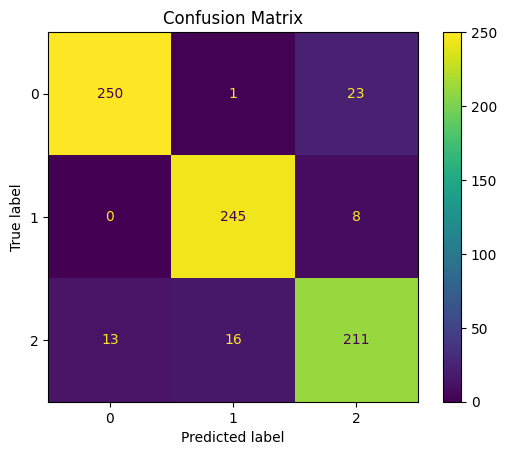

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, model.predict(X_test), labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.savefig('confusion_matrix.png')
